In [ ]:
#Jason Ton
#Linear Regression implementation for my Foundation of Data Analysis Class
#**SOME ANSWERS/EXPLANATIONS ARE IN THE CODE COMMENTS**


#PROBLEM 1

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



hand1 = np.loadtxt('hand1.dat',dtype=np.int, delimiter=',')
hand2 = np.loadtxt('hand2.dat',dtype=np.float, delimiter=',')



plt.scatter(hand1[:,0],hand1[:,1])
plt.scatter(hand2[:,0],hand2[:,1])
hand1T = np.transpose(hand1)


<ipython-input-1-f703cfacb947>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hand1 = np.loadtxt('hand1.dat',dtype=np.int, delimiter=',')


FileNotFoundError: ignored

[[ 0.80673157 -0.59091807]
 [ 0.59091807  0.80673157]]


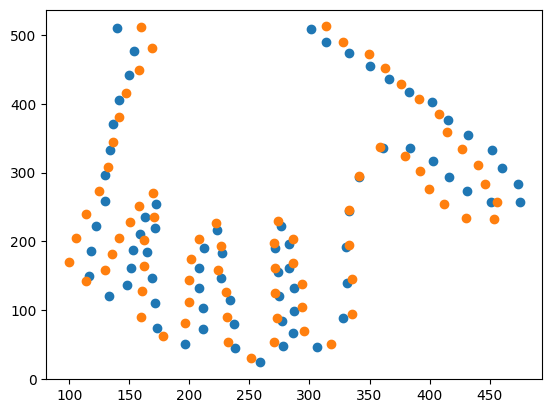

In [ ]:
#PART B)
#Creating  A^T * A
ATA = np.matmul(hand1T, hand2)
#Decomposing the Matrix
SVD = np.linalg.svd(ATA)

#Computing the rotation matrix
R = np.matmul(SVD[0],SVD[2])
print(R)
# The angle of rotation is 36.22, We get this by setting cos(theta) =0.80673157
#as we know the structure of our rotation matrix is [[cos(theta),-sin(theta)]]
#                                                   [[sin(theta),cos(theta)]]
#So using our R matrix we can solve for theta.


newHand2 = np.zeros((72, 2))

#Rotating the points 
for i in range(len(hand2)): 
  newHand2[i] = np.matmul(R, hand2[i])


#C) See results, THe hand does rotate and becomes aligned
plt.scatter(hand1[:,0],hand1[:,1] )
plt.scatter(newHand2[:,0],newHand2[:,1] )

Text(0.5, 1.0, 'Scatterplot')

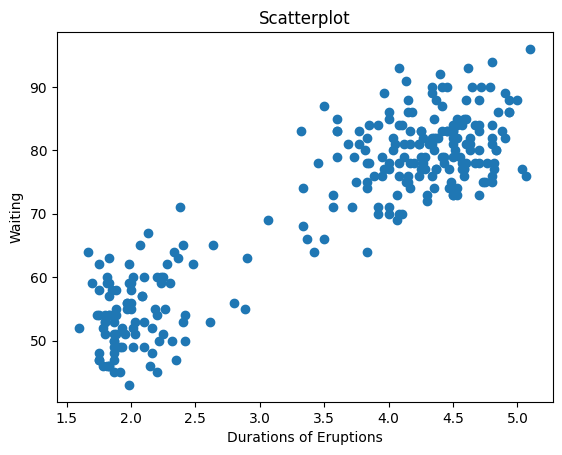

In [ ]:
#PROBLEM 2
faithful = pd.read_csv(r'faithful.csv')
faithful= faithful.to_numpy()

#a) I believe there is a relationship between eruption time and time until the next eruption because, as the
plt.scatter(faithful[:,0],faithful[:,1])
plt.xlabel("Durations of Eruptions") #x label
plt.ylabel("Waiting") #y label

plt.title("Scatterplot")

Mean of eruption time 3.4877830882352936
Mean of waiting time 70.8970588235294


Text(0.5, 1.0, 'Centered Scatterplot')

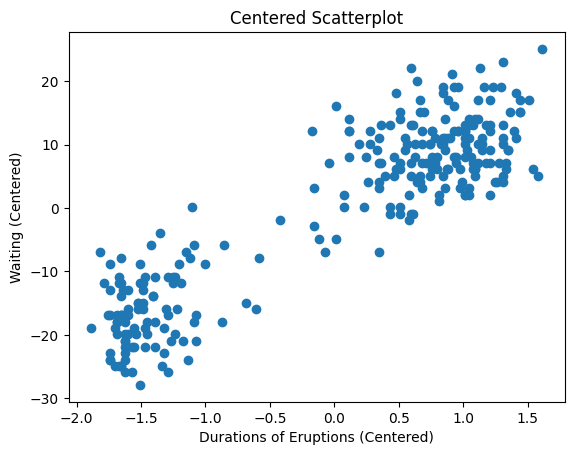

In [ ]:
#b)
meanEruptions = np.mean(faithful[:,0])
meanWaiting = np.mean(faithful[:,1])
print("Mean of eruption time " + str(meanEruptions) + "\n"
      "Mean of waiting time " + str(meanWaiting)
      )
centeredErupt = [x - meanEruptions for x in faithful[:,0]]
centeredWaiting = [x - meanWaiting for x in faithful[:,1]]
#Centering
plt.scatter(centeredErupt, centeredWaiting)
plt.xlabel("Durations of Eruptions (Centered)") #x label
plt.ylabel("Waiting (Centered)") #y label
plt.title("Centered Scatterplot")


In [ ]:
#c)

#Using equation dot(x,y)/((||X||)(||Y||))

dotP = np.dot(centeredErupt, centeredWaiting)

MagErupt = np.linalg.norm(centeredErupt)
MagWaiting = np.linalg.norm(centeredWaiting)

#apply equation
corr = dotP/(MagErupt*MagWaiting)


#The value and the sign both match what I was expecting, it is positive and close to 1 meaning there is a 
#strong correlation

(1.0, 5.5)

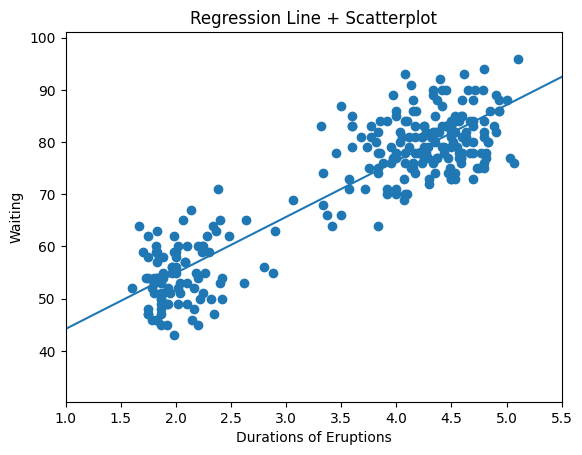

In [ ]:
#d)
 
#Find b (beta) (dot(xCentered, yCentered))/(||x||)^2

b = np.dot(centeredErupt,centeredWaiting)/(MagErupt*MagErupt)

#Find a (alpha)  ymean - (b)xmean

a = meanWaiting-(b*meanEruptions)

#plotting scatter and regression line
xseq = np.linspace(0, 6, 90)

plt.scatter(faithful[:,0], faithful[:,1])

plt.plot(xseq, a + b * xseq);

plt.xlabel("Durations of Eruptions") #x label
plt.ylabel("Waiting") #y label

plt.title("Regression Line + Scatterplot")
plt.xlim([1, 5.5])

#ANSWER
#The Sign of the slope and the values lign up very well as we can see from the graph
#The line is following the trends very well 

In [ ]:
#e)

# x = 2.2
#finding the waiting time
#For this problem we can simply just plug our x value into our equation and our y is our value 
#y =b*x +a

val = 2.2*b + a 

#guessing units cause we are not given
print("The time you can expect to wait when a 2.2 minute eruption occurs is " + str(round(val,3)) +" Months")

The time you can expect to wait when a 2.2 minute eruption occurs is 57.08 Months


In [ ]:
#f)

#For this problem we need to find ||e||^2, then we can apply the equation below
# R^2 = 1-((||e||^2)/||ycenter||^2)

#To find e we can use the equation centeredyi = Slopex+ei and solve for ei and create a vector of eis

errors = []
for i in range(len(centeredWaiting)):
  temp = centeredWaiting[i] - b*centeredErupt[i]
  errors.append(temp)

e = np.linalg.norm(errors)

Rsquare = round(1-((e**2)/(MagWaiting**2)),4)




#We can also use the 1-(RSS/TSS) formula
#Where RSS is the residual sum of squares and T is the total sum of squares
#I did both methods to double check so I will display both methods
#and will report my answer below
RSS=0
TSS=0

for i in range(len(faithful)):

  temp1 = (faithful[:,1][i]) 
  temp2 = faithful[:,0][i]*b+a
  temp = temp1-temp2
  RSS+= temp**2

  TSS+=(faithful[:,1][i]-meanWaiting)**2



Rsquare2 = 1-(RSS/TSS)

print("R^2: "+ str(Rsquare))

print("Proportion of explained variance is "+ str(round(RSS,3))+ "/" + str(round(TSS,3)))


R^2: 0.8115
Proportion of explained variance is 9443.387/50087.118
